# Importing Data - API (US CPI data)
Source: https://www.alphavantage.co/ Inflation

In [178]:
#This API returns the annual inflation rates (consumer prices) of the United States via API
#The data is in the shape of a dictionary with keys for the column names and values showing the values in that column

import requests

url = 'https://www.alphavantage.co/query?function=INFLATION&apikey=MJJULQ2LBSJJVTWV'
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Inflation - US Consumer Prices', 'interval': 'annual', 'unit': 'percent', 'data': [{'date': '2021-01-01', 'value': '4.69785886363739'}, {'date': '2020-01-01', 'value': '1.23358439630637'}, {'date': '2019-01-01', 'value': '1.81221007526015'}, {'date': '2018-01-01', 'value': '2.44258329692818'}, {'date': '2017-01-01', 'value': '2.13011000365963'}, {'date': '2016-01-01', 'value': '1.26158320570537'}, {'date': '2015-01-01', 'value': '0.118627135552435'}, {'date': '2014-01-01', 'value': '1.62222297740821'}, {'date': '2013-01-01', 'value': '1.46483265562714'}, {'date': '2012-01-01', 'value': '2.06933726526059'}, {'date': '2011-01-01', 'value': '3.15684156862206'}, {'date': '2010-01-01', 'value': '1.64004344238989'}, {'date': '2009-01-01', 'value': '-0.35554626629975'}, {'date': '2008-01-01', 'value': '3.83910029665101'}, {'date': '2007-01-01', 'value': '2.85267248150136'}, {'date': '2006-01-01', 'value': '3.22594410070407'}, {'date': '2005-01-01', 'value': '3.39274684549547'}, {'da

In [179]:
#view the keys of the dictionary retrived from the API

data.keys() 

dict_keys(['name', 'interval', 'unit', 'data'])

In [180]:
#import pandas and convert the dictionary to a dataframe

import pandas as pd
df = data['data'] 
df = pd.DataFrame(df)
df

,date,value
0,2021-01-01,4.69785886363739
1,2020-01-01,1.23358439630637
2,2019-01-01,1.81221007526015
3,2018-01-01,2.44258329692818
4,2017-01-01,2.13011000365963
...,...,...
57,1964-01-01,1.27891156462583
58,1963-01-01,1.2396694214876
59,1962-01-01,1.19877334820185
60,1961-01-01,1.07072414764723


In [181]:
#view the top 5 rows of the dataframe

print(df.head())

         date             value
0  2021-01-01  4.69785886363739
1  2020-01-01  1.23358439630637
2  2019-01-01  1.81221007526015
3  2018-01-01  2.44258329692818
4  2017-01-01  2.13011000365963


In [182]:
#look at the description of the data in the dataframe created

print(df.describe())

              date             value
count           62                62
unique          62                62
top     2021-01-01  4.69785886363739
freq             1                 1


In [183]:
#look at the summary of the data in the dataframe and check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   value   62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [184]:
#convert the datatypes for both columns from object to float and date

df['value']=df['value'].astype(float)
df['date']= pd.to_datetime(df['date'])

In [185]:
#check the datatypes have been converted and what each column is

df.dtypes

date     datetime64[ns]
value           float64
dtype: object

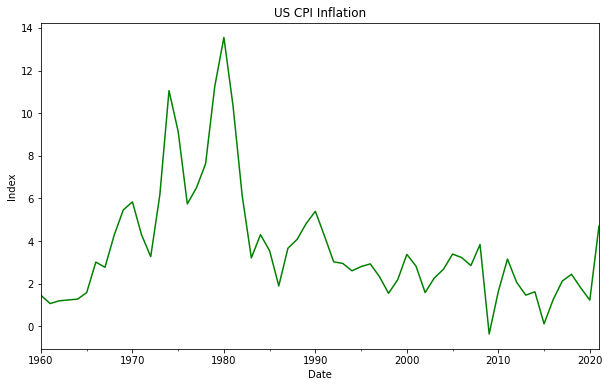

In [186]:
#create a graph of the data

import matplotlib.pyplot as plt
df.plot(x = 'date', y = 'value', kind = 'line', color= 'g',figsize = (10,6),legend=False)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('US CPI Inflation')
plt.show()

In [187]:
#dataframe of the US CPI values

print('Shape of US CPI dataframe:', df.shape)

Shape of US CPI dataframe: (62, 2)


In [188]:
#data for the prediction

df = df[df['date']> '1995-01-01']
cpi = df.copy()
print('Total data for prediction:', df.shape[0])

Total data for prediction: 26


In [189]:
#normalising US CPI values

del df['date']
scaler=MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(26, 1)


In [190]:
#separate the data for train and test

training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data, test_data=df[0:training_size,:],df[training_size:len(df),:1]
print('train_data:',train_data.shape)
print('test_data:', test_data.shape)

train_data: (18, 1)
test_data: (8, 1)


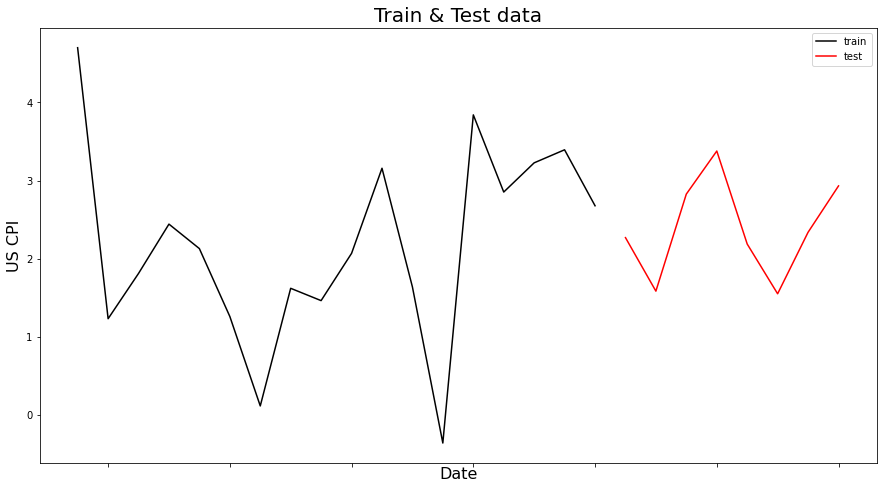

In [191]:
import seaborn as sns

fig,ax = plt.subplots(figsize = (15,8))
sns.lineplot(x=cpi['date'][:18], y = cpi['value'][:18], color = 'black')
sns.lineplot(x=cpi['date'][18:], y = cpi['value'][18:], color = 'red')

ax.set_title('Train & Test data', fontsize = 20, loc='center')
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('US CPI', fontsize = 16)
ax.legend(loc='upper right', labels = ('train', 'test'))
plt.gca().invert_xaxis()
ax.tick_params(labelbottom=False)


In [193]:
from sklearn.ensemble import GradientBoostingClassifier

X = np.array(df.index).reshape(-1,1)
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

CPI_model = GradientBoostingClassifier()
CPI_model.fit(X_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [177]:
from sklearn.metrics import confusion_matrix, classification_report

X = np.array(df.index).reshape(-1,1)
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

y_pred = CPI_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [172]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r_2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
import math

predictions = CPI_model.predict(X_test)

print("Mean Absolute Error : " + str(mean_absolute_error(y_test, predictions))
#print("Root Mean squared Error : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_2588/1588505111.py, line 9)

In [10]:
#import re
#find the number of years of data in the df
#use regex to return the years from the calculation of the max date less the min date divided by days

import re
years = re.findall(r'\d{2}\s',str((df['date'].max() - df['date'].min())/365.25))

In [11]:
#print out the number of years
#first need to convert the list to a string and add on years to the number

print(years[0], 'years')      

61  years


In [28]:
#! pip install chart_studio

In [73]:
import chart_studio.plotly as py
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

import numpy as np

X = np.array(df.index).reshape(-1,1)
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

scaler = StandardScaler().fit(X_train)

lm = LinearRegression()
lm.fit(X_train, y_train)

layout = dict(plot_bgcolor = 'light grey',
             xaxis=dict(title='Years back'),
             yaxis=dict(title='US CPI'))

act = go.Scatter(
    x = X_train.T[0],
    y = y_train, 
    mode = 'markers',
    name = 'Actual')

pred = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train), 
    mode = 'lines',
    name = 'Predicted')

df_data = [act, pred]

plot2 = go.Figure(data = df_data, layout=layout)
plot2['layout']['xaxis']['autorange'] = 'reversed'
iplot(plot2)


# Importing Data - csv files (Bitcoin prices for June and July)

In [47]:
#import pandas and import a csv file with Bitcoin prices for June 2022

import pandas as pd
df1 = pd.read_csv('June22 daily BTC.csv')
df1.shape

(30, 7)

In [48]:
#import another csv file with Bitcoin prices for July 2022

df2 = pd.read_csv('July22 daily BTC.csv')
df2.shape

(31, 7)

In [49]:
#view the top 5 rows of the June data imported

df1.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,01/06/2022,31957.28516,29501.58789,31792.55469,29799.08008,41135817341,29799.08008
1,02/06/2022,30604.73438,29652.70508,29794.89063,30467.48828,29083562061,30467.48828
2,03/06/2022,30633.03516,29375.68945,30467.80664,29704.39063,26175547452,29704.39063
3,04/06/2022,29930.56445,29500.00586,29706.13867,29832.91406,16588370958,29832.91406
4,05/06/2022,30117.74414,29574.44922,29835.11719,29906.66211,17264085441,29906.66211


In [50]:
#view the last 5 rows of data from the July data imported

df2.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
26,27/07/2022,22986.52930,21070.80664,21244.16992,22930.54883,31758955233,22930.54883
27,28/07/2022,24110.47070,22722.26563,22933.64063,23843.88672,40212386158,23843.88672
28,29/07/2022,24294.78711,23481.17383,23845.21289,23804.63281,35887249746,23804.63281
29,30/07/2022,24572.58008,23580.50781,23796.81836,23656.20703,28148218301,23656.20703
30,31/07/2022,24121.64258,23275.70313,23652.07031,23336.89648,23553591896,23336.89648


# Join the June and July datasets into one dataframe called Prices

In [51]:
#join the two months datasets into one dataframe

dfJune = pd.DataFrame(df1)
dfJuly = pd.DataFrame(df2)
Prices = pd.concat([dfJune, dfJuly],axis = 0)

In [52]:
#view the newly created Dataframe of prices for June and July

print(Prices)

          Date         High          Low        Open         Close  \
0   01/06/2022  31957.28516  29501.58789  31792.55469  29799.08008   
1   02/06/2022  30604.73438  29652.70508  29794.89063  30467.48828   
2   03/06/2022  30633.03516  29375.68945  30467.80664  29704.39063   
3   04/06/2022  29930.56445  29500.00586  29706.13867  29832.91406   
4   05/06/2022  30117.74414  29574.44922  29835.11719  29906.66211   
..         ...          ...          ...          ...          ...   
26  27/07/2022  22986.52930  21070.80664  21244.16992  22930.54883   
27  28/07/2022  24110.47070  22722.26563  22933.64063  23843.88672   
28  29/07/2022  24294.78711  23481.17383  23845.21289  23804.63281   
29  30/07/2022  24572.58008  23580.50781  23796.81836  23656.20703   
30  31/07/2022  24121.64258  23275.70313  23652.07031  23336.89648   

         Volume    Adj Close  
0   41135817341  29799.08008  
1   29083562061  30467.48828  
2   26175547452  29704.39063  
3   16588370958  29832.91406  
4   

In [53]:
#check that the new Prices dataset is of a DataFrame type

isinstance(Prices,pd.DataFrame)

True

In [54]:
#look at the description and statistics of the data of all columns in the dataframe created

Prices.describe()

,High,Low,Open,Close,Volume,Adj Close
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01,58.000000
mean,23594.063686,22332.692816,23076.506212,22938.154650,3.035281e+10,22924.591562
std,3743.076603,3677.299782,3805.146182,3633.064549,9.888942e+09,3551.673428
min,19371.748050,17708.623050,19010.902340,19017.642580,1.639082e+10,19242.255860
25%,20913.322270,19937.791020,20547.814450,20548.246090,2.415025e+10,20557.433590
50%,21877.138670,20781.912110,21496.494140,21502.337890,2.862467e+10,21547.272460
75%,24196.818360,23009.949220,23652.070310,23389.433590,3.363101e+10,23376.299312
max,31957.285160,30020.265630,31792.554690,31370.671880,6.820456e+10,31370.671880


# Check for any missing values (9, 17 and 18 June have NaN Adj Close)

In [55]:
#look at the information for the columns in the Prices dataframe
#see that there are 61 records, but only 58 records for the Adj Close column
Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       61 non-null     object 
 1   High       61 non-null     float64
 2   Low        61 non-null     float64
 3   Open       61 non-null     float64
 4   Close      61 non-null     float64
 5   Volume     61 non-null     int64  
 6   Adj Close  58 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.8+ KB


In [56]:
#another way to check for missing data is as follows
#you can see that there are 3 values missing in the Adj Close column

Prices.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    3
dtype: int64

# Filling the blanks (NaN values) with the mean of the Adj Close column

In [57]:
#We can fill in the missing values by a variety of different methods
#In this project I will fill those missing values with the mean of the Adj Close column

Prices['Adj Close'] = Prices['Adj Close'].fillna(Prices['Adj Close'].mean())

# #Passing in a list of the 3 rows which had blanks

In [58]:
#check the rows that had missing values to see that they all have the mean populated for Adj Close on those dates
#this value matches the mean shown in prices.describe above

Prices.iloc[[8,16,17]]

,Date,High,Low,Open,Close,Volume,Adj Close
8,09/06/2022,30609.31055,30020.26563,30215.27930,30111.99805,21692004719,22924.591562
16,17/06/2022,21243.31250,20326.51953,20385.71875,20471.48242,27132421514,22924.591562
17,18/06/2022,20736.04102,17708.62305,20473.42578,19017.64258,42009436760,22924.591562


In [59]:
#view the prices dataframe

print(Prices)

          Date         High          Low        Open         Close  \
0   01/06/2022  31957.28516  29501.58789  31792.55469  29799.08008   
1   02/06/2022  30604.73438  29652.70508  29794.89063  30467.48828   
2   03/06/2022  30633.03516  29375.68945  30467.80664  29704.39063   
3   04/06/2022  29930.56445  29500.00586  29706.13867  29832.91406   
4   05/06/2022  30117.74414  29574.44922  29835.11719  29906.66211   
..         ...          ...          ...          ...          ...   
26  27/07/2022  22986.52930  21070.80664  21244.16992  22930.54883   
27  28/07/2022  24110.47070  22722.26563  22933.64063  23843.88672   
28  29/07/2022  24294.78711  23481.17383  23845.21289  23804.63281   
29  30/07/2022  24572.58008  23580.50781  23796.81836  23656.20703   
30  31/07/2022  24121.64258  23275.70313  23652.07031  23336.89648   

         Volume    Adj Close  
0   41135817341  29799.08008  
1   29083562061  30467.48828  
2   26175547452  29704.39063  
3   16588370958  29832.91406  
4   

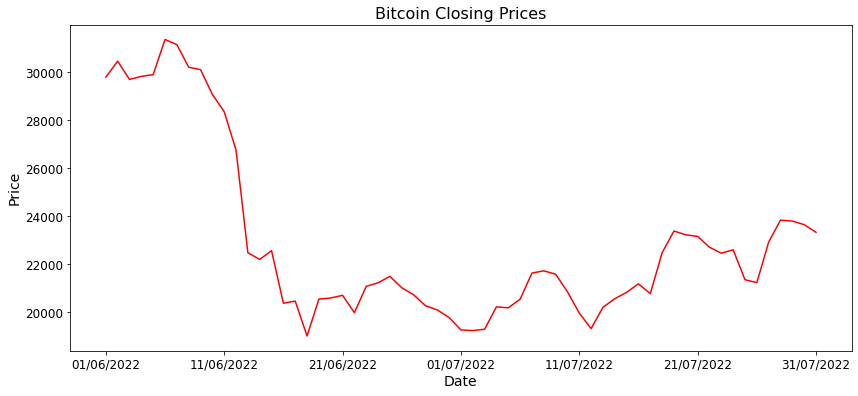

In [60]:
#import matplotlib
#plot a line graph of the Close prices of Bitcoin for June and July

import matplotlib.pyplot as plt
Prices.plot(x = 'Date', y = 'Close', kind = 'line', figsize = (14,6),legend=False, color = 'r', fontsize = 12)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Bitcoin Closing Prices', fontsize = 16)
plt.show()

<AxesSubplot:>

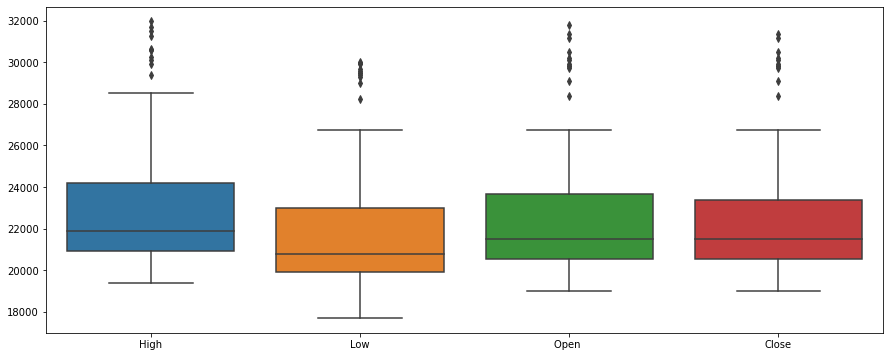

In [61]:
#import Seaborn
#plot a boxplot chart of four of the Bitcoin prices

import seaborn as sns

Pricing_df = Prices.drop(['Volume','Adj Close'], axis=1)

plt.figure(figsize=(15, 6))
sns.boxplot(data=Pricing_df)

# Define a custom function to create resusable code

In [62]:
#Create a function 
#Assign the function with inputs to a variable
#Create a new column in the dataframe and assign the variable to it

import numpy as np
import pandas as pd

def DayVar(a,b):
    """This function will calculate the variance between two kinds of price for a day.
        Example: the difference between Low and High price each day.
    
    Args: 
        arg_1(float): The first kind of price you want to compare eg. Low Price.
        arg_2(float): The second kind of price you want to compare to first price to eg. High Price.
        
    Returns:
        Float: A value of the difference between the two Prices.
        
    Raises:
        ValueError: None expected, unless there is a non-numeric value in one of the columns and no value can be calculated.
        
    Notes:
        This is my first function :)
        """
    return (b - a)

d = DayVar(Prices['Low'],Prices['High'])
Prices['PriceDiff'] = d

In [63]:
#Create a function 
#Assign the function with its input to a variable
#Create a new column in the dataframe and assign the variable to it

def DayChg(c):
    """This function will calculate the daily change of a specified price.
        Example: the change in the Closing price over the past day.
    
    Args: 
        arg_1(float): The price you want to see the daily % change for.
        
    Returns:
        Float: A percentage value of the change in the assigned price over the past day.
        
    Raises:
        ValueError: None expected, unless there is a non-numeric value in one of the columns and no value can be calculated.
        
    Notes:
        This is my second function :)
        """
    return (c.pct_change() * 100)

d = DayChg(Prices['Close'])
Prices['DayChg(%)'] = d

In [64]:
#check the new functions in the new columns were created
#Price Diff and DayChg(%) are the new columns

Prices.head()

,Date,High,Low,Open,Close,Volume,Adj Close,PriceDiff,DayChg(%)
0,01/06/2022,31957.28516,29501.58789,31792.55469,29799.08008,41135817341,29799.08008,2455.69727,NaN
1,02/06/2022,30604.73438,29652.70508,29794.89063,30467.48828,29083562061,30467.48828,952.02930,2.243050
2,03/06/2022,30633.03516,29375.68945,30467.80664,29704.39063,26175547452,29704.39063,1257.34571,-2.504629
3,04/06/2022,29930.56445,29500.00586,29706.13867,29832.91406,16588370958,29832.91406,430.55859,0.432675
4,05/06/2022,30117.74414,29574.44922,29835.11719,29906.66211,17264085441,29906.66211,543.29492,0.247204


In [65]:
#reuse the created function
#assign it to a new variable
#create a new column in the Prices dataframe and assign the variable to it

e = DayChg(Prices['Volume'])
Prices['VolDayChg(%)'] = e

In [66]:
#Check the datafram again to see that the new column was added
#VolDayChg(%) is the new column

Prices.head()

,Date,High,Low,Open,Close,Volume,Adj Close,PriceDiff,DayChg(%),VolDayChg(%)
0,01/06/2022,31957.28516,29501.58789,31792.55469,29799.08008,41135817341,29799.08008,2455.69727,NaN,NaN
1,02/06/2022,30604.73438,29652.70508,29794.89063,30467.48828,29083562061,30467.48828,952.02930,2.243050,-29.298689
2,03/06/2022,30633.03516,29375.68945,30467.80664,29704.39063,26175547452,29704.39063,1257.34571,-2.504629,-9.998825
3,04/06/2022,29930.56445,29500.00586,29706.13867,29832.91406,16588370958,29832.91406,430.55859,0.432675,-36.626460
4,05/06/2022,30117.74414,29574.44922,29835.11719,29906.66211,17264085441,29906.66211,543.29492,0.247204,4.073423


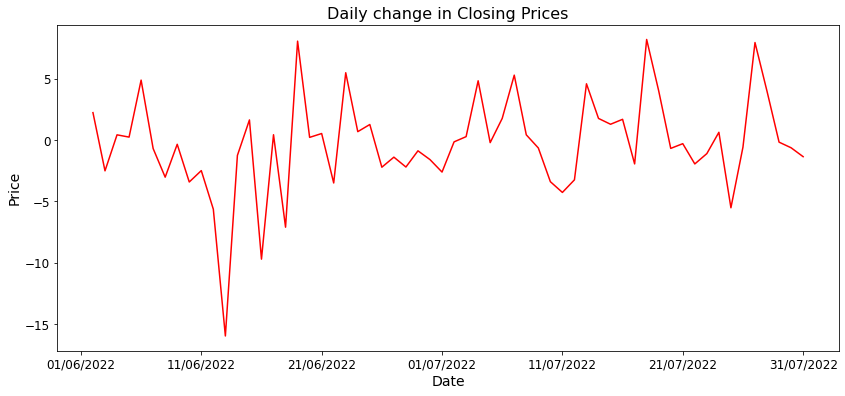

In [67]:
#plot the daily change in the closing prices using the newly created column in the Prices dataframe

Prices.plot(x = 'Date', y = 'DayChg(%)', kind = 'line', figsize = (14,6),legend=False, color = 'r', fontsize = 12)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Daily change in Closing Prices', fontsize = 16)
plt.show()

# Drop duplicates

In [68]:
#already imported pandas above
#import a csv file with Bitcoin prices for June 2022 with 4 days duplicated
#the shape output shows 34 rows which should only be 30 (30 days in June)

import pandas as pd
df3 = pd.read_csv('Duplicates June BTC.csv')
df3.shape

(34, 7)

In [69]:
#find the duplicate rows in the dataframe
#view theh duplicate rows

duplicaterows = df3[df3.duplicated()]
print(duplicaterows)

          Date         High          Low        Open         Close  \
30  27/06/2022  21478.08984  20620.19922  21028.23828  20735.47852   
31  28/06/2022  21164.42383  20228.81250  20731.54492  20280.63477   
32  29/06/2022  20364.15625  19937.79102  20281.16992  20104.02344   
33  30/06/2022  20141.16016  18729.65625  20108.31250  19784.72656   

         Volume    Adj Close  
30  20965695707  20735.47852  
31  21381535161  20280.63477  
32  23552740328  20104.02344  
33  26267239923  19784.72656  


In [70]:
#drop the duplicate rows and keep the last duplicate
#see that index rows 26,27,28,29 were removed from the dataframe
#NaN values were populated above - see section: Filling the blanks (NaN values) with the mean of the Adj Close column

df3.drop_duplicates(keep='last')

,Date,High,Low,Open,Close,Volume,Adj Close
0,01/06/2022,31957.28516,29501.58789,31792.55469,29799.08008,41135817341,29799.08008
1,02/06/2022,30604.73438,29652.70508,29794.89063,30467.48828,29083562061,30467.48828
2,03/06/2022,30633.03516,29375.68945,30467.80664,29704.39063,26175547452,29704.39063
3,04/06/2022,29930.56445,29500.00586,29706.13867,29832.91406,16588370958,29832.91406
4,05/06/2022,30117.74414,29574.44922,29835.11719,29906.66211,17264085441,29906.66211
5,06/06/2022,31693.29102,29894.18750,29910.28320,31370.67188,31947336829,31370.67188
6,07/06/2022,31489.68359,29311.68359,31371.74219,31155.47852,40770974039,31155.47852
7,08/06/2022,31253.69141,29944.40430,31151.48047,30214.35547,30242059107,30214.35547
8,09/06/2022,30609.31055,30020.26563,30215.27930,30111.99805,21692004719,NaN
9,10/06/2022,30245.80859,28978.14648,30110.33008,29083.80469,29867476527,29083.80469


# Examples of lists and dictionaries and iterators

In [71]:
#create a list

mylist = [10, 11, 12, 13, 14]
print(mylist)

[10, 11, 12, 13, 14]


In [72]:
print(type(mylist))

<class 'list'>


In [73]:
#get first 2 values from the list

print(mylist[0:2])

[10, 11]


In [74]:
#add a value into my list

mylist.append(15)
print(mylist)

[10, 11, 12, 13, 14, 15]


In [75]:
#remove a value from my list

mylist.remove(10)
print(mylist)

[11, 12, 13, 14, 15]


In [76]:
#create a list of values using iterator
#values in the list should be from 1 to 10

new_list = []
for x in range(1,11):
    new_list.append(x)

print(new_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [77]:
#create a dictionary called PriceTypes with 4 keys(type of price label) and values(prices)
#separate the key and value into a list

PriceTypes = {'High':20141.16, 'Low':18729.66,'Open':20108.31,'Close':19784.73}

mylist = [(k,v) for k,v in PriceTypes.items()]
print(f"mylist:{mylist}")

mylist:[('High', 20141.16), ('Low', 18729.66), ('Open', 20108.31), ('Close', 19784.73)]


In [78]:
#create a list of all the values in the Close column of the Prices dataframe, appending each to the list

my_val = Prices['Close']
listvalues = []
for item in my_val:
    listvalues.append(float(item))
print(listvalues)

[29799.08008, 30467.48828, 29704.39063, 29832.91406, 29906.66211, 31370.67188, 31155.47852, 30214.35547, 30111.99805, 29083.80469, 28360.81055, 26762.64844, 22487.38867, 22206.79297, 22572.83984, 20381.65039, 20471.48242, 19017.64258, 20553.27148, 20599.53711, 20710.59766, 19987.0293, 21085.87695, 21231.65625, 21502.33789, 21027.29492, 20735.47852, 20280.63477, 20104.02344, 19784.72656, 19269.36719, 19242.25586, 19297.07617, 20231.26172, 20190.11523, 20548.24609, 21637.58789, 21731.11719, 21592.20703, 20860.44922, 19970.55664, 19323.91406, 20212.07422, 20569.91992, 20836.32813, 21190.31641, 20779.34375, 22485.68945, 23389.43359, 23231.73242, 23164.62891, 22714.97852, 22465.47852, 22609.16406, 21361.70117, 21239.75391, 22930.54883, 23843.88672, 23804.63281, 23656.20703, 23336.89648]


In [79]:
#create a dictionary

my_data = dict({'name':'Beth','surname': 'Cartledge', 'location':'London'})
print(my_data)

{'name': 'Beth', 'surname': 'Cartledge', 'location': 'London'}


In [80]:
#print the type to check it is a dictionary

print(type(my_data))

<class 'dict'>


In [81]:
#add a key and value to the dictionary

my_data['height'] = 1.78
print(my_data)

{'name': 'Beth', 'surname': 'Cartledge', 'location': 'London', 'height': 1.78}


In [82]:
#remove a key and value from the dictionary

del my_data['surname']
print(my_data)

{'name': 'Beth', 'location': 'London', 'height': 1.78}


In [83]:
#get the value for a key in the dictionary

print(my_data['location'])

London


In [84]:
#converting the Prices dataframe to a dictionary

my_dict = Prices.to_dict()
print(my_dict)

{'Date': {0: '01/07/2022', 1: '02/07/2022', 2: '03/07/2022', 3: '04/07/2022', 4: '05/07/2022', 5: '06/07/2022', 6: '07/07/2022', 7: '08/07/2022', 8: '09/07/2022', 9: '10/07/2022', 10: '11/07/2022', 11: '12/07/2022', 12: '13/07/2022', 13: '14/07/2022', 14: '15/07/2022', 15: '16/07/2022', 16: '17/07/2022', 17: '18/07/2022', 18: '19/07/2022', 19: '20/07/2022', 20: '21/07/2022', 21: '22/07/2022', 22: '23/07/2022', 23: '24/07/2022', 24: '25/07/2022', 25: '26/07/2022', 26: '27/07/2022', 27: '28/07/2022', 28: '29/07/2022', 29: '30/07/2022', 30: '31/07/2022'}, 'High': {0: 20632.67188, 1: 19371.74805, 2: 19558.26953, 3: 20258.74805, 4: 20635.4668, 5: 20595.5293, 6: 21771.81641, 7: 22314.94141, 8: 21877.13867, 9: 21591.08008, 10: 20856.35352, 11: 20043.44531, 12: 20223.05273, 13: 20789.89453, 14: 21138.24414, 15: 21514.4043, 16: 21600.64063, 17: 22633.0332, 18: 23666.96289, 19: 24196.81836, 20: 23388.32227, 21: 23671.92773, 22: 22977.21094, 23: 22974.00195, 24: 22649.12109, 25: 21361.12109, 26: 

# Importing data for Regex and Machine Learning

In [57]:
#import pandas and import a csv file with random client investment data
#check the shape of the data (rows and columns)

import pandas as pd
Client = pd.read_csv('RandomClientData.csv')
Client.shape

(12477, 8)

In [58]:
#See what the data looks like

Client.head(10)

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE
0,2012,"Bank of America Corp.%2f Bank of America,NA",MALE,18,DE,United States,Alternative,3443
1,2012,Chicago Carriage Cab Company,MALE,18,IL,United States,Alternative,94830
2,2012,Barrett & Porto,FEMALE,18,IL,United States,Alternative,31441
3,2014,Sutherland LLC,FEMALE,18,NJ,United States,Alternative,68607
4,2012,Museums in the Park,MALE,18,IL,United States,Alternative,19391
5,2017,VPC 740 Rush LLC,FEMALE,18,IL,United States,Alternative,56279
6,2017,"Siebert Cisneros Shank & Co., L.L.C.",FEMALE,18,IL,United States,Alternative,1269
7,2017,"Ispas, Luminita",MALE,18,IL,United States,Alternative,72546
8,2017,"Merrill Lynch, Pierce, Fenner & Smith, Inc.",MALE,18,NC,United States,Alternative,27696
9,2017,"Adekola, Michelle",MALE,18,IL,United States,Alternative,85510


In [59]:
#check for any missing data
Client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12477 entries, 0 to 12476
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FIRST_INV_DATE   12477 non-null  int64 
 1   NAME             12475 non-null  object
 2   GENDER           12477 non-null  object
 3   AGE              12477 non-null  int64 
 4   STATE            12470 non-null  object
 5   COUNTRY          12477 non-null  object
 6   INVESTMENT_TYPE  12477 non-null  object
 7   NET_ASSET_VALUE  12477 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 779.9+ KB


In [60]:
#there are 7 rows that are missing the State and 2 rows that are missing the name
#as we have 12477 rows of data, I will drop these rows rather than populate random data

null_data = Client[Client.isnull().any(axis=1)]
null_data

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE
2292,2011,Government Enhancement Services,FEMALE,34,NaN,United States,Cash,192303
3930,2011,Catherine Cook School,MALE,39,NaN,United States,ETF,263919
4763,2011,"dEvRY, iNC",FEMALE,41,NaN,United States,ETF,293274
9335,2011,Holsten,MALE,54,NaN,United States,Currency,715726
9373,2019,NaN,FEMALE,54,MN,United States,Equities,679656
9501,2018,NaN,FEMALE,55,IL,United States,Equities,682720
10345,2011,"Bruno, Al",FEMALE,57,NaN,United States,Equities,808254
10978,2012,55th & State LLC,FEMALE,59,NaN,United States,Equities,658256
11174,2011,"CGI Technologies & Solutions, Inc",MALE,60,NaN,United States,Equities,978059


In [61]:
#delete rows with NaN, None or Null values

Client = Client.dropna()
Client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 12476
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FIRST_INV_DATE   12468 non-null  int64 
 1   NAME             12468 non-null  object
 2   GENDER           12468 non-null  object
 3   AGE              12468 non-null  int64 
 4   STATE            12468 non-null  object
 5   COUNTRY          12468 non-null  object
 6   INVESTMENT_TYPE  12468 non-null  object
 7   NET_ASSET_VALUE  12468 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 876.7+ KB


In [62]:
#check the stats of the Client dataframe

Client.describe()

,FIRST_INV_DATE,AGE,NET_ASSET_VALUE
count,12468.000000,12468.000000,1.246800e+04
mean,2014.104668,46.094963,4.943743e+05
std,2.246650,12.595825,3.068845e+05
min,2011.000000,18.000000,3.580000e+02
25%,2012.000000,36.000000,2.672862e+05
50%,2014.000000,45.000000,4.800030e+05
75%,2016.000000,54.000000,6.713010e+05
max,2020.000000,96.000000,2.097928e+06


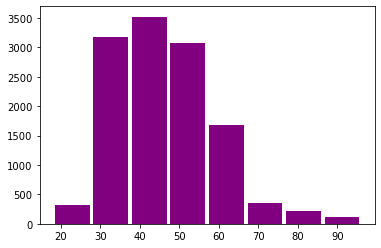

In [63]:
#plot a histogram of the age column to see the distribution of ages into 8 buckets(bins)

import matplotlib.pyplot as plt
import numpy as np

plt.hist(Client['AGE'], bins = 8, rwidth = .9,color = 'purple')
plt.show()

# Using Regex 

In [64]:
#import re
#find words with 10 characters or more

import re
print(re.findall(r'\w{10,}',str(Client['NAME'])))

['Sutherland', 'Continental', 'Corporation', 'Electrical', 'Management']


In [65]:
#find words which start with 'Co'

print(re.findall(r'Co\w+',str(Client['NAME'])))

['Corp', 'Company', 'Continental', 'Corporation']


In [66]:
#and print out the number of rows that contain words starting with 'Dev' (there are 536)

Devs = Client['NAME'].str.contains('Dev\w+').value_counts()
print(Devs)

False    11932
True       536
Name: NAME, dtype: int64


In [67]:
#Find all the rows where there seems to be an address in the Name column

Client[Client['NAME'].str.contains('\d{4}[-]\d{4}')]

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE
172,2017,1010-1058 West 35th Street (Chicago) LLC,MALE,23,IL,United States,Alternative,37647
468,2011,5202-5210 S. Cornell LLC,MALE,29,NJ,United States,Currency,53331
931,2013,1124-1128 Wrightwood LLC,FEMALE,30,IL,United States,Currency,184583
1627,2013,5100-5120 S. Ellis LLC,MALE,32,NJ,United States,Currency,10401
1889,2013,2040-2042 N Damen Ave LLC,FEMALE,33,IL,United States,Cash,316437
2133,2011,5335-5345 S. Kimbark LLC,MALE,34,NJ,United States,Currency,130833
2360,2019,1218-1220 N. Carman LLC,MALE,34,IL,United States,Currency,325551
3159,2017,5019-5021 N ASHLAND LLC C/O DREW BRENEMAN,FEMALE,36,IL,United States,Currency,142468
3203,2014,2040-2042 N Damen Ave LLC,MALE,37,IL,United States,Currency,324317
3882,2011,"5400-5408 S. Inglesdie, LLC",MALE,39,NJ,United States,ETF,496723


# Machine Learning

In [68]:
#convert the FEMALE and MALE to 0 and 1 respectively in the GENDER column of the Client dataframe

Client['GENDER'] = Client['GENDER'].replace(['FEMALE','MALE'],[0,1])
Client.head()

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE
0,2012,"Bank of America Corp.%2f Bank of America,NA",1,18,DE,United States,Alternative,3443
1,2012,Chicago Carriage Cab Company,1,18,IL,United States,Alternative,94830
2,2012,Barrett & Porto,0,18,IL,United States,Alternative,31441
3,2014,Sutherland LLC,0,18,NJ,United States,Alternative,68607
4,2012,Museums in the Park,1,18,IL,United States,Alternative,19391


In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = Client.drop(columns = ['FIRST_INV_DATE','NAME','STATE','COUNTRY','INVESTMENT_TYPE'],axis=1)
y = Client['INVESTMENT_TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score

0.599037690457097

In [70]:
print(predictions)

['Equities' 'Equities' 'Bonds' ... 'Bonds' 'Bonds' 'ETF']


In [125]:
#use function created previously called DayVar
#use the DayVar function to calculate the years since the first investment up until the current year
#add the new column on the end of the dataframe Client

currentyear = 2022
yearssince = DayVar(Client['FIRST_INV_DATE'],currentyear)
Client['YEARS_SINCE_INV'] = yearssince

Client.head()

,FIRST_INV_DATE,NAME,GENDER,AGE,STATE,COUNTRY,INVESTMENT_TYPE,NET_ASSET_VALUE,YEARS_SINCE_INV
0,2012,"Bank of America Corp.%2f Bank of America,NA",1,18,DE,United States,Alternative,3443,10
1,2012,Chicago Carriage Cab Company,1,18,IL,United States,Alternative,94830,10
2,2012,Barrett & Porto,0,18,IL,United States,Alternative,31441,10
3,2014,Sutherland LLC,0,18,NJ,United States,Alternative,68607,8
4,2012,Museums in the Park,1,18,IL,United States,Alternative,19391,10


0.8738356177779507


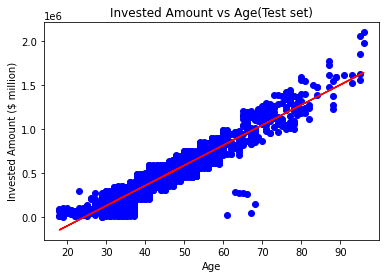

In [138]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

X = Client['AGE'].values #independent variable array = YEARS_SINCE_INV
y = Client['NET_ASSET_VALUE'].values #dependent variable vector = NET_ASSET_VALUE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

regr = LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)

plt.scatter(X_test, y_test, color='b')
plt.plot(X_test,y_pred, color='r')

plt.title('Invested Amount vs Age(Test set)')

plt.xlabel('Age')
plt.ylabel('Invested Amount ($ million)')

plt.show()

In [143]:
import pandas as pd
import numpy as np

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

X = Client.drop(columns = ['FIRST_INV_DATE','NAME','STATE','COUNTRY','INVESTMENT_TYPE'],axis=1).values
y = Client['INVESTMENT_TYPE'].values

classifier = ensemble.RandomForestClassifier(n_jobs=-1)
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'criterion':['gini','entropy'],
}

model = model_selection.GridSearchCV(
    estimator=classifier,
    param_grid = param_grid,
    scoring='accuracy',
    verbose=10,
    n_jobs=1,
    cv=5,
)
model.fit(X,y)
print(model.best_score_)
print(model.best_estimator_.get_params())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 1/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.278 total time=   0.2s
[CV 2/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 2/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.770 total time=   0.2s
[CV 3/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 3/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.767 total time=   0.2s
[CV 4/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 4/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.821 total time=   0.2s
[CV 5/5; 1/18] START criterion=gini, max_depth=3, n_estimators=100..............
[CV 5/5; 1/18] END criterion=gini, max_depth=3, n_estimators=100;, score=0.311 total time=   0.2s
[CV 1/5; 2/18] START criterion=gini, max_dep

[CV 1/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.356 total time=   0.3s
[CV 2/5; 10/18] START criterion=entropy, max_depth=3, n_estimators=100..........
[CV 2/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.769 total time=   0.3s
[CV 3/5; 10/18] START criterion=entropy, max_depth=3, n_estimators=100..........
[CV 3/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.767 total time=   0.3s
[CV 4/5; 10/18] START criterion=entropy, max_depth=3, n_estimators=100..........
[CV 4/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.853 total time=   0.3s
[CV 5/5; 10/18] START criterion=entropy, max_depth=3, n_estimators=100..........
[CV 5/5; 10/18] END criterion=entropy, max_depth=3, n_estimators=100;, score=0.346 total time=   0.3s
[CV 1/5; 11/18] START criterion=entropy, max_depth=3, n_estimators=200..........
[CV 1/5; 11/18] END criterion=entropy, max_depth=3, n_estimators=200;, score=0.356 to

In [165]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


knn = KNeighborsClassifier(n_neighbors=8)

X = Client[['AGE','YEARS_SINCE_INV']].values
y = Client['INVESTMENT_TYPE'].values
print(X.shape, y.shape)

knn.fit(X, y)


(12468, 2) (12468,)


KNeighborsClassifier(n_neighbors=8)

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify = y)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7441860465116279


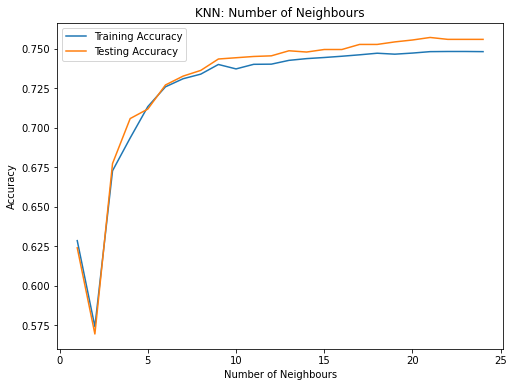

In [167]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,25)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors= neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
plt.figure(figsize=(8,6))
plt.title('KNN: Number of Neighbours')
plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Testing Accuracy')

plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')

plt.show()